# FNN with MNIST Dataset

### Installing the packages

In [1]:
#uncomment this to install the packages
#pip install pandas
#pip install numpy
#pip install matplotlib
#pip install tensorflow 
## for more information on installing tensorflow visit : https://www.tensorflow.org/install

### Importing the packages

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt

### Loading the dataset

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("Training data sample size: ", x_train.shape)
print("Testing data sample size: ", x_test.shape)

Training data sample size:  (60000, 28, 28)
Testing data sample size:  (10000, 28, 28)


### Normalizing the dataset and converting output to categorical class

In [4]:
x_train=(x_train)/255
x_test=(x_test)/255

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

print("Unique values in output: ", np.unique(y_train))

Unique values in output:  [0 1 2 3 4 5 6 7 8 9]


In [5]:
#converting the output to categorical class
num_class = 10
y_train = to_categorical(y_train, num_class)
y_test = to_categorical(y_test, num_class)

print("Training output sample size: ", y_train.shape)
print("Testing output sample size: ", y_test.shape)

Training output sample size:  (60000, 10)
Testing output sample size:  (10000, 10)


### Creating FNN Model

In [6]:
input_layer = Input(shape = (x_train.shape[1], ))
#hidden layers
dense_layer_1 = Dense( 256, activation = 'relu')(input_layer)
dense_layer_2 = Dense(128, activation = 'relu')(dense_layer_1)
dense_layer_3 = Dense(64, activation = 'relu')(dense_layer_2)
dense_layer_4 = Dense(32, activation = 'relu')(dense_layer_3)
#output layers
output = Dense(y_train.shape[1], activation = 'softmax')(dense_layer_4)

model = Model(inputs = input_layer, outputs = output)

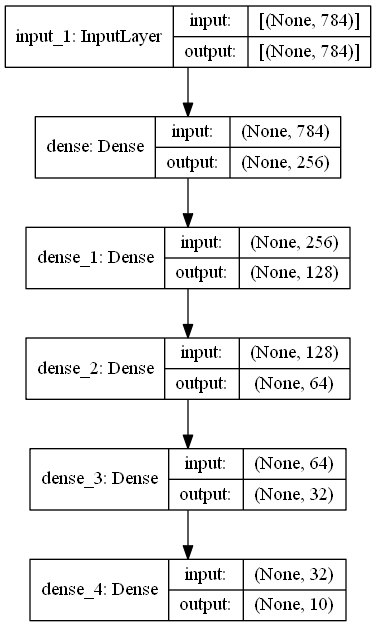

In [7]:
plot_model(model, show_shapes = True)

In [8]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [9]:
training = model.fit(x_train, y_train, batch_size = 120, epochs = 50, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/50
500/500 [==============================] - 3s 4ms/step - loss: 0.5964 - acc: 0.8226 - val_loss: 0.1398 - val_acc: 0.9567
Epoch 2/50
500/500 [==============================] - 1s 3ms/step - loss: 0.1119 - acc: 0.9662 - val_loss: 0.0920 - val_acc: 0.9695
Epoch 3/50
500/500 [==============================] - 1s 3ms/step - loss: 0.0699 - acc: 0.9784 - val_loss: 0.0861 - val_acc: 0.9736
Epoch 4/50
500/500 [==============================] - 1s 3ms/step - loss: 0.0529 - acc: 0.9838 - val_loss: 0.0741 - val_acc: 0.9775
Epoch 5/50
500/500 [==============================] - 1s 3ms/step - loss: 0.0346 - acc: 0.9897 - val_loss: 0.0838 - val_acc: 0.9745
Epoch 6/50
500/500 [==============================] - 1s 3ms/step - loss: 0.0309 - acc: 0.9902 - val_loss: 0.0865 - val_acc: 0.9756
Epoch 7/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0251 - acc: 0.9921 - val_loss: 0.0769 - val_acc: 0.9788
Epoch 8/50
500/500 [==============================] - 1s 3ms/step - loss: 0.

### Ploting training loss vs iteration

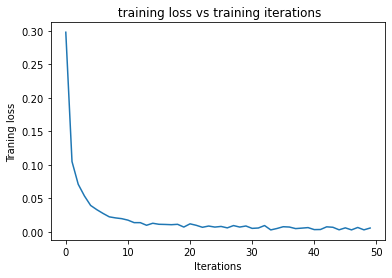

In [10]:
plt.plot(training.history['loss'])
plt.title(' training loss vs training iterations')
plt.ylabel('Traning loss')
plt.xlabel('Iterations')
plt.show()

### Ploting testing loss vs iteration

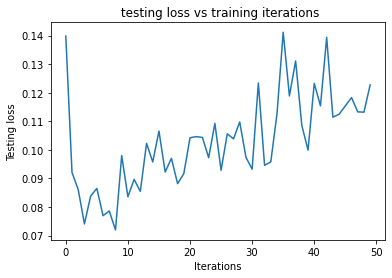

In [11]:
plt.plot(training.history['val_loss'])
plt.title(' testing loss vs training iterations')
plt.ylabel('Testing loss')
plt.xlabel('Iterations')
plt.show()